In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
remove_attention_failers = 0

In [ ]:
def label_category(tail, shape):
    if tail == "T" and shape == "S":
        return "high"
    elif tail == "N" and shape == "C":
        return "low"
    else:
        return "medium"

def extract_basic_info(csv_path):
    df = pd.read_csv(csv_path)
    
    # Free text responses
    free_texts = df['explanation_box.text'].dropna().tolist()
    
    # Feedback
    feedback = df['feedback_text.text'].dropna().tolist()
    #Actual food needed
    food_amount = df['food_amount'].dropna().tolist()
    
    # Trial stop time
    isi_values = df['ISI.stopped'].dropna().tolist()

    #Get the ISI value for the last training trial, store it
    trial_stop_time = isi_values[-1] if isi_values else np.nan

    #First row with a non-empty value in 'images_list', which shows the order of testing images presented
    images_row = df[df['images_list'].notna()].iloc[0] if not df[df['images_list'].notna()].empty else None
    #Turn the images from PNGs to names
    images = [img.split('/')[-1].replace('.png','') for img in images_row['images_list'].split(',')]

    #First row with a non-empty value in 'sliderRatings', which shows the ratings for testing images
    ratings_row = df[df['sliderRatings'].notna()].iloc[0] if not df[df['sliderRatings'].notna()].empty else None
    #Turn them into floats split by commas
    ratings = [float(r) for r in ratings_row['sliderRatings'].strip('[]').split(',')]

    train_categories =  df['category'].dropna().tolist()
    train_tail = df['tail'].dropna().tolist()
    train_shape = df['shape'].dropna().tolist()
    train_color = df['color'].dropna().tolist()

    test_categories =  [label_category(stim.split('_')[0], stim.split('_')[2]) for stim in images]
    condition = images_row['condition'] if images_row is not None and 'condition' in images_row else np.nan
    #Add in the order of images during training
    training_image_order = [img.split('/')[-1].replace('.png','') 
                        for img in df['image_file'].dropna().tolist()]
        
    # Slider responses
    columns_to_extract = [
        'shape_discrete_slider.response',
        'color_discrete_slider.response',
        'tail_discrete_slider.response',
        'shape_direction_slider.response',
        'color_direction_slider.response',
        'tail_direction_slider.response',
        'shape_continuous_slider.response',
        'color_continuous_slider.response',
        'tail_continuous_slider.response'
    ]

    slider_responses = {}
    for col in columns_to_extract:
        nonempty_rows = df[df[col].notna()]
        if not nonempty_rows.empty:
            # Take the first non-empty response
            val = nonempty_rows.iloc[0][col]
        else:
            val = np.nan
        slider_responses[col] = val

        #Adding attention check result
        att_rows = df[df['button_3_correct.numClicks'].notna()]
        if not att_rows.empty:
            att_val = att_rows.iloc[0]['button_3_correct.numClicks']
        else:
            att_val = np.nan
        attention_check = 1 if att_val == 1 else 0

    result = {
        'participant': os.path.basename(csv_path)[:3],
        'free_texts': free_texts,
        'feedback': feedback,
        'food_amount': food_amount,
        'trial_stop_time': trial_stop_time,
        'testing_image_order': images,
        'testing_responses': ratings,
        'training_categories': train_categories,
        'training_tail': train_tail,
        'training_shape': train_shape,
        'training_color': train_color,
        'testing_categories': test_categories,
        'conditionOrder': condition,
        'training_image_order': training_image_order,
        'attention_check': attention_check
    }
    result.update(slider_responses)
    return result

topdir = '/Users/sm6511/Desktop/Prediction-Accomodation-Exp'
study = 'Pilot'
date = '2025-11-25'
datadir = os.path.join(topdir, f'data/{study}/Accomodate')
cleaneddir = os.path.join(topdir, f'data/{study}/Cleaned')
all_participants = []

for fname in os.listdir(datadir):
    if fname.endswith('.csv') and fname:
        participant_id = fname[:3]
        if date not in fname:  # skip files
            continue
        csv_path = os.path.join(datadir, fname)
        print(csv_path)
        info = extract_basic_info(csv_path)
        all_participants.append(info)

df_all = pd.DataFrame(all_participants)
if remove_attention_failers:
    df_all = df_all[df_all['attention_check'] == 1]
    df_all.to_csv(os.path.join(cleaneddir, 'PilotAccomodate.csv'), index=False)
else:
    df_all.to_csv(os.path.join(cleaneddir, 'PilotAccomodate.csv'), index=False)
print(df_all)

IndentationError: expected an indented block after 'else' statement on line 119 (1272748844.py, line 121)

In [9]:
print(df_all['attention_check'].sum())

23


In [15]:
explainer_time = df_all.groupby(['participant'])['trial_stop_time'].sum()

print(explainer_time)
#explainer_time = explainer_time.to_frame(name='trial_stop_time')

#explainer_time['Explainer_Quality'] = ['No', 'Tracked', 'Tracked', 'Tracked', 'No', 'No']

#print(explainer_time)


participant
001     448.6750
002     507.9090
003     438.6395
004     314.2888
005     397.8680
006     189.4255
007    1270.7656
008     779.0407
009     478.9115
010     323.0032
011     523.4764
012     751.4138
013     990.0280
014    1390.7015
015     530.2262
016     304.0345
017     752.3458
018     505.7190
019     352.6373
020     338.9352
021     305.7446
022     400.5242
023     686.5479
024     606.9388
025     382.1580
026     481.2175
027     462.9379
028     256.8580
029     248.8910
030     846.1921
Name: trial_stop_time, dtype: float64


In [43]:
participant_id = '018'

row = df_all[df_all['participant'] == participant_id]

free_texts = row['free_texts'].iloc[0] 
feedback = row['feedback'].iloc[0]
print(f"Free text responses for participant {participant_id}:")
for i, text in enumerate(free_texts, 1):
    print(f"Response {i}: {text}")

print(f"\nFeedback for participant {participant_id}: {feedback}")


Free text responses for participant 018:
Response 1: It’s square and yellow with a tail
Response 2: It’s round and yellow and has a tail 
Response 3: It’s round and yellow and has no tail 
Response 4: It’s blue and round and has a tail
Response 5: It’s  square and blue and has no tail
Response 6: It’s square and yellow and has no tail
Response 7: It’s square and blue and has a tsil
Response 8: It’s blue abd round and has no tail 
Response 9: It’s square and yellow and has no tail
Response 10: It’s round and yellow and has no tail 
Response 11: It’s square and blue and has nobtsil
Response 12: It’s blue and round and has no tail 
Response 13: It’s blue and round and has no tail
Response 14: Blue and square and has a tail
Response 15: Round yellow has a tail
Response 16: Square yellow has a tail
Response 17: Round yellow no tail 
Response 18: Square yellow has a tail
Response 19: Square yellow no tail 
Response 20: Blue square has a tail
Response 21: Blue round has a tail 
Response 22: B

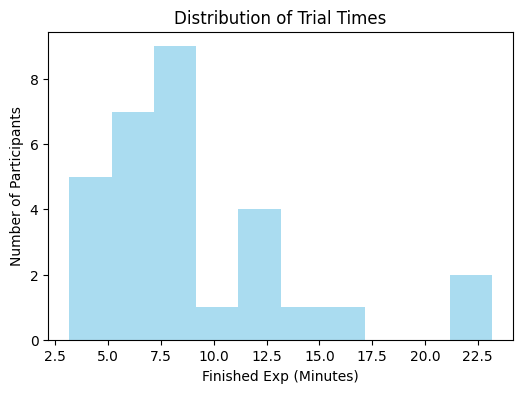

In [38]:
plt.figure(figsize=(6,4))
plt.hist(df_all['trial_stop_time'].dropna()/60, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Finished Exp (Minutes)')
plt.ylabel('Number of Participants')
plt.title('Distribution of Trial Times')
plt.savefig('PrePilotPlots/trial_times_histogram.png')
plt.show()

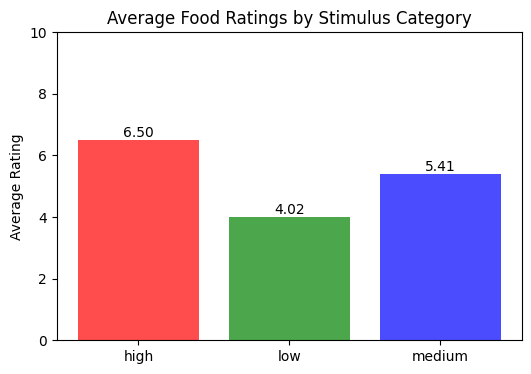

In [49]:
def AverageFoodCalclator(participants_to_use):
    df_subset = df_all[df_all['participant'].isin(participants_to_use)]
    all_trials = []
    for i in df_subset['participant']:
        trial_order = df_subset[df_subset['participant'] == i]['image_order'].iloc[0]
        ratings = df_subset[df_subset['participant'] == i]['ratings'].iloc[0]
        categories = df_subset[df_subset['participant'] == i]['categories'].iloc[0]
    
        df_participant = pd.DataFrame({
            'participant': i,
            'trial_order': trial_order,
            'ratings': ratings,
            'categories': categories
        })
        all_trials.append(df_participant)
    df_average = pd.concat(all_trials, ignore_index=True)
    avg_ratings = df_average.groupby('categories')['ratings'].mean()
    return avg_ratings

participants_to_use = df_all['participant'].tolist()
#participants_to_use = ['002', '003', '004']
avg_ratings = AverageFoodCalclator(participants_to_use)

plt.figure(figsize=(6,4))
bars = plt.bar(avg_ratings.index, avg_ratings.values, color=['red','green','blue'], alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f"{bar.get_height():.2f}", ha='center')
plt.ylabel('Average Rating')
#plt.title('Average Food Ratings by Stimulus Category\n (Participants with Explanations that tracked')
plt.title('Average Food Ratings by Stimulus Category')
plt.ylim(0, 10)
plt.savefig('PrePilotPlots/FoodRatingsAcc.png')
plt.show()


In [ ]:
participants_to_use = [1, 2, 4, 6]   
df_subset = df_all[df_all['participant'].isin(participants_to_use)]

In [50]:
'shape_discrete_slider.response',
'color_discrete_slider.response',
'tail_discrete_slider.response',
'shape_direction_slider.response',
'color_direction_slider.response',
'tail_direction_slider.response',
'shape_continuous_slider.response',
'color_continuous_slider.response',
'tail_continuous_slider.response'

shape_relevance = 0
tail_relevance = 0
color_relevance = 0
for i in df_all['participant']:
    tail_int = df_all[df_all['participant'] == i]['tail_discrete_slider.response'].iloc[0]
    shape_int = df_all[df_all['participant'] == i]['shape_discrete_slider.response'].iloc[0]
    color_int = df_all[df_all['participant'] == i]['color_discrete_slider.response'].iloc[0]
    tail_relevance += 1 if tail_int == 'Yes' else 0
    shape_relevance += 1 if shape_int == 'Yes' else 0
    color_relevance += 1 if color_int== 'Yes' else 0
print("Tail Relevance:",  tail_relevance)
print("Shape Relevance", shape_relevance)
print("Color Relevance", color_relevance)





Tail Relevance: 22
Shape Relevance 25
Color Relevance 19


In [51]:
columns_direction = [
    'shape_direction_slider.response',
    'color_direction_slider.response',
    'tail_direction_slider.response',]
columns_continuous = [
    'shape_continuous_slider.response',
    'color_continuous_slider.response',
    'tail_continuous_slider.response']

for col in columns_direction:
    print(df_all[col].value_counts(dropna=False))
for col in columns_continuous:
    print(f"Average of {col}: {df_all[col].mean()}, n = {df_all[col].count()}")


shape_direction_slider.response
Square      14
NaN         11
Circular     5
Name: count, dtype: int64
color_direction_slider.response
NaN       13
Yellow    10
Blue       7
Name: count, dtype: int64
tail_direction_slider.response
NaN               14
Having a tail     14
Having no tail     2
Name: count, dtype: int64
Average of shape_continuous_slider.response: 4.6, n = 25
Average of color_continuous_slider.response: 3.9473684210526314, n = 19
Average of tail_continuous_slider.response: 4.2272727272727275, n = 22


OLD BELOW

In [46]:
import pandas as pd
import numpy as np

def extract_basic_info(csv_path):
    """
    Extract free text responses, feedback, and trial stop time from a CSV.
    
    Returns a dictionary with:
    - free_texts: list of explanation_box.text responses
    - feedback: list of feedback_text.text responses
    - trial_stop_time: last ISI.stopped value
    """
    df = pd.read_csv(csv_path)
    
    # Free text responses
    free_texts = df['explanation_box.text'].dropna().tolist()
    
    # Feedback
    feedback = df['feedback_text.text'].dropna().tolist()
    
    # Trial stop time
    isi_values = df['ISI.stopped'].dropna().tolist()
    trial_stop_time = isi_values[-1] if isi_values else np.nan
    
    return {
        'free_texts': free_texts,
        'feedback': feedback,
        'trial_stop_time': trial_stop_time
    }

# Example usage
topdir = '/Users/sm6511/Desktop/Prediction-Accomodation-Exp'
datadir = f"{topdir}/Data"
csv_file = f"{datadir}/005_explain2_2025-11-21_10h56.28.019.csv"

basic_info = extract_basic_info(csv_file)

# Print nicely
for i, text in enumerate(basic_info['free_texts'], 1):
    print(f"Response {i}: {text}")

print("Feedback:", basic_info['feedback'])
print("Trial stop time:", basic_info['trial_stop_time'])


Response 1: He was hungry, but the sperk was spicy so he only needed bit
Response 2: It's available to him and he's small so he needs more food to grow
Response 3: He is yellow and that's a dominant color so he eats more
Response 4: He has round shapes, so he needs an even number of food
Response 5: His curly tail requires it.
Response 6: He had a hard night, so he needs to fill his belly
Response 7: It was avavailable, so why not?
Response 8: He's a stupid animal so all he does it eat what is in front of him
Response 9: His rectangle shape needs 6 of food
Response 10: To clean his plate like a good boy
Response 11: His momma sperk told him to
Response 12: he was storing up for the winter
Response 13: To impress a lady sperk
Response 14: It was the amount he was given
Response 15: He was being bullied into eating, so he ate it all
Response 16: So he could grow up bgi and strong
Response 17: He stole it and wanted to destory the evidence
Response 18: Why not?
Response 19: It tasted yumm

In [49]:
def extract_basic_info(csv_path): 
    df = pd.read_csv(csv_path)
    free_texts = df['explanation_box.text'].dropna().tolist()
    feedback = df['feedback_text.text'].dropna().tolist()
    isi_values = df['ISI.stopped'].dropna().tolist() 
    trial_stop_time = isi_values[-1] if isi_values else np.nan 
    images_row = df[df['images_list'].notna()].iloc[0] if not df[df['images_list'].notna()].empty else None 
    ratings_row = df[df['sliderRatings'].notna()].iloc[0] if not df[df['sliderRatings'].notna()].empty else None 
    images = [img.split('/')[-1].replace('.png','') for img in images_row['images_list'].split(',')] 
    ratings = [float(r) for r in ratings_row['sliderRatings'].strip('[]').split(',')]
    return { 'free_texts': free_texts, 'feedback': feedback, 'trial_stop_time': trial_stop_time, 'image_order': images, 'ratings': ratings }
topdir = '/Users/sm6511/Desktop/Prediction-Accomodation-Exp'
datadir = os.path.join(topdir, 'Data')
first_csv = os.path.join(datadir, '005_explain2_2025-11-21_10h56.28.019.csv')
basic_info = extract_basic_info(first_csv)

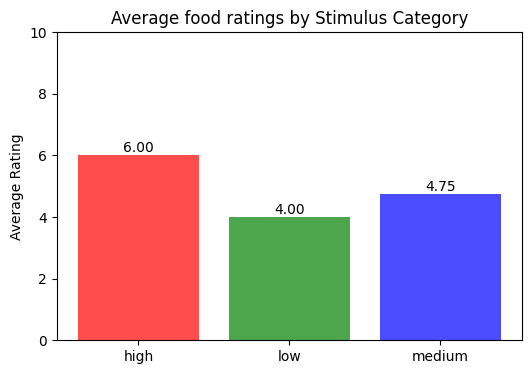

In [50]:
stim_info = [
    {
        'stimulus': stim,
        'rating': rating,
        'category': label_category(stim.split('_')[0], stim.split('_')[2])
    }
    for stim, rating in zip(basic_info['image_order'], basic_info['ratings'])
]
df_stim = pd.DataFrame(stim_info)
avg_per_category = df_stim.groupby('category')['rating'].mean()
plt.figure(figsize=(6,4))
bars = plt.bar(avg_per_category.index, avg_per_category.values, color=['red','green','blue'], alpha=0.7)

# Add text labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f"{bar.get_height():.2f}", ha='center')

plt.ylabel('Average Rating')
plt.title('Average food ratings by Stimulus Category')
plt.ylim(0, 10)
plt.show()

OLD BELOW

In [ ]:
free_texts = df['explanation_box.text'].dropna().tolist()

for i, text in enumerate(free_texts, 1):
    print(f"Response {i}: {text}")

print("Feedback:", df['feedback_text.text'].dropna().to_list())
print("Trial stop time:", df['ISI.stopped'].dropna().tolist()[-1])


  stimulus  rating category
0    N_B_C     5.0      low
1    T_Y_C     4.0   medium
2    T_B_C     6.0   medium
3    N_B_S     6.0   medium
4    N_Y_C     7.0      low
5    N_Y_S     8.0   medium
6    T_Y_S     8.0     high
7    T_B_S     9.0     high
category
high      8.5
low       6.0
medium    6.0
Name: rating, dtype: float64


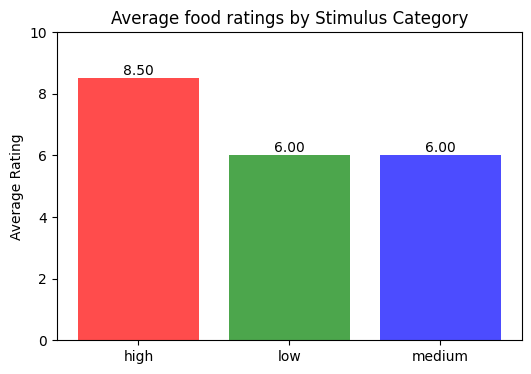

In [63]:
# Assign food amount categories
def label_category(tail, shape):
    if tail == "T" and shape == "S":
        return "high"
    elif tail == "N" and shape == "C":
        return "low"
    else:
        return "medium"

# Find the rows with data
images_row = df[df['images_list'].notna()].iloc[0]
ratings_row = df[df['sliderRatings'].notna()].iloc[0]

# Create list of image and ratings in order
images = [img.split('/')[-1].replace('.png','') for img in images_row['images_list'].split(',')]
ratings = [float(r) for r in ratings_row['sliderRatings'].strip('[]').split(',')]

# Dataframe with relevant info
stim_info = [
    {
        'stimulus': stim,
        'rating': rating,
        'category': label_category(stim.split('_')[0], stim.split('_')[2])
    }
    for stim, rating in zip(images, ratings)
]

df_stim = pd.DataFrame(stim_info)
print(df_stim)

# Compute average rating per category
avg_per_category = df_stim.groupby('category')['rating'].mean()
print(avg_per_category)

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(avg_per_category.index, avg_per_category.values, color=['red','green','blue'], alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{bar.get_height():.2f}", ha='center')
plt.ylabel('Average Rating')
plt.title('Average food ratings by Stimulus Category')
plt.ylim(0, 10)
plt.show()


In [64]:
columns_to_extract = [
    'shape_discrete_slider.response',
    'color_discrete_slider.response',
    'tail_discrete_slider.response',
    'shape_direction_slider.response',
    'color_direction_slider.response',
    'tail_direction_slider.response',
    'shape_continuous_slider.response',
    'color_continuous_slider.response',
    'tail_continuous_slider.response'
]

data_dict = {}


for col in columns_to_extract:
    nonempty_rows = df[df[col].notna()]
    
    if not nonempty_rows.empty:
        # Store the value from the first non-empty row
        val = nonempty_rows.iloc[0][col]
        data_dict[col] = val
    else:
        # No data: store NaN
        data_dict[col] = np.nan

# Convert to DataFrame with a single row
df_sliders = pd.DataFrame([data_dict])
print(df_sliders)

  shape_discrete_slider.response color_discrete_slider.response  \
0                            Yes                             No   

  tail_discrete_slider.response shape_direction_slider.response  \
0                            No                          Square   

   color_direction_slider.response  tail_direction_slider.response  \
0                              NaN                             NaN   

   shape_continuous_slider.response  color_continuous_slider.response  \
0                               5.0                               NaN   

   tail_continuous_slider.response  
0                              NaN  


Old

In [ ]:
# Pick the 8th row (Python is 0-indexed, so row 7)
images_str = df.loc[7, 'images_list']
ratings_str = df.loc[31, 'sliderRatings']

# Convert to lists
images = [img.strip() for img in images_str.split(',')]

stimulus_types = [img.split('/')[-1].replace('.png','') for img in images]

ratings_str_clean = ratings_str.strip('[]')

ratings = [float(r.strip()) for r in ratings_str_clean.split(',')]

stimulus_types = [img.split('/')[-1].replace('.png','') for img in images]
stimulus_ratings = list(zip(stimulus_types, ratings))

for stim, rating in stimulus_ratings:
    print(f"{stim}: {rating}")



In [ ]:
import matplotlib.pyplot as plt
def label_category(tail, shape):
    if tail == "T" and shape == "S":
        return "high"
    elif tail == "N" and shape == "C":
        return "low"
    else:
        return "medium"

stim_info = []
for stim in stimulus_types:
    parts = stim.split('_')  # ['N', 'Y', 'C']
    tail = parts[0]          # N or T
    shape = parts[2]         # C or S
    category = label_category(tail, shape)
    stim_info.append({'stimulus': stim, 'rating': ratings[stimulus_types.index(stim)], 'category': category})

# Convert to DataFrame for easier grouping
df_stim = pd.DataFrame(stim_info)

# Compute average rating per category
avg_per_category = df_stim.groupby('category')['rating'].mean()

print(avg_per_category)
